In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

# Define the categories
categories = ['Beer', 'Burger', 'Champagne', 'Cider', 'CoffeeTeaMilk', 'Dessert', 
              'Kids', 'Other', 'Salad', 'SoftDrinks', 'Spirits', 'VariedFood', 'Wine', 'Wings']

We will be using the Manhattan distance metric as it is more suitable for high-dimensional data than the Euclidean metric. Read paper high-dimensional-metrics. Let us begin by loading the datasets.

In [ ]:
# Distiluse model
# Load the datasets
x_train_distil_orig = pd.read_csv('/content/x-train-distil-orig.csv')
x_train_distil_proc = pd.read_csv('/content/x-train-distil-proc.csv')
x_test_distil_orig = pd.read_csv('/content/x-test-distil-orig.csv')
x_test_distil_proc = pd.read_csv('/content/x-test-distil-proc.csv')

y_train_distil_orig = pd.read_csv('/content/y-train-distil-orig.csv')
y_train_distil_proc = pd.read_csv('/content/y-train-distil-proc.csv')
y_test_distil_orig = pd.read_csv('/content/y-test-distil-orig.csv')
y_test_distil_proc = pd.read_csv('/content/y-test-distil-proc.csv')

# Process the datasets
x_train_distil_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_train_distil_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_distil_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_distil_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)

y_train_distil_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_train_distil_proc.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_distil_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_distil_proc.drop(labels=['ArticleName'], axis=1, inplace=True)

In [ ]:
# Para-mini model
# Load the datasets
x_train_para_mini_orig = pd.read_csv('/content/x-train-para-mini-orig.csv')
x_train_para_mini_proc = pd.read_csv('/content/x-train-para-mini-proc.csv')
x_test_para_mini_orig = pd.read_csv('/content/x-test-para-mini-orig.csv')
x_test_para_mini_proc = pd.read_csv('/content/x-test-para-mini-proc.csv')

y_train_para_mini_orig = pd.read_csv('/content/y-train-para-mini-orig.csv')
y_train_para_mini_proc = pd.read_csv('/content/y-train-para-mini-proc.csv')
y_test_para_mini_orig = pd.read_csv('/content/y-test-para-mini-orig.csv')
y_test_para_mini_proc = pd.read_csv('/content/y-test-para-mini-proc.csv')

# Process the datasets
x_train_para_mini_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_train_para_mini_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_para_mini_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_para_mini_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)

y_train_para_mini_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_train_para_mini_proc.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_para_mini_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_para_mini_proc.drop(labels=['ArticleName'], axis=1, inplace=True)

In [ ]:
# Para-base model
# Load the datasets
x_train_para_base_orig = pd.read_csv('/content/x-train-para-base-orig.csv')
x_train_para_base_proc = pd.read_csv('/content/x-train-para-base-proc.csv')
x_test_para_base_orig = pd.read_csv('/content/x-test-para-base-orig.csv')
x_test_para_base_proc = pd.read_csv('/content/x-test-para-base-proc.csv')

y_train_para_base_orig = pd.read_csv('/content/y-train-para-base-orig.csv')
y_train_para_base_proc = pd.read_csv('/content/y-train-para-base-proc.csv')
y_test_para_base_orig = pd.read_csv('/content/y-test-para-base-orig.csv')
y_test_para_base_proc = pd.read_csv('/content/y-test-para-base-proc.csv')

# Process the datasets
x_train_para_base_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_train_para_base_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_para_base_orig.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)
x_test_para_base_proc.drop(labels=['ArticleName', 'Class1'], axis=1, inplace=True)

y_train_para_base_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_train_para_base_proc.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_para_base_orig.drop(labels=['ArticleName'], axis=1, inplace=True)
y_test_para_base_proc.drop(labels=['ArticleName'], axis=1, inplace=True)

Now we can use cross validation and run k-NN. We will increase the k-parameter with a step of 2 to avoid ties. We are using the mean of the 4 scores (5 scores for original datasets, 4 for the processed datasets) as the representative score. 

In [ ]:
# Distiluse model
# Original data
# We stop the loop at sqrt(n) as that is the recommended stopping point
scores_distil_orig_cv = []
std_distil_orig_cv = []
for i in range(1, int(np.sqrt(len(x_train_distil_orig)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_distil_orig, 
                           np.ravel(y_train_distil_orig), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_distil_orig_cv.append(score)
  std_distil_orig_cv.append(std)

print("Scores distil_orig_cv = ", scores_distil_orig_cv)
print("Std distil_orig_cv = ", std_distil_orig_cv)

# Processed data
scores_distil_proc_cv = []
std_distil_proc_cv = []
for i in range(1, int(np.sqrt(len(x_train_distil_proc)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_distil_proc, 
                           np.ravel(y_train_distil_proc), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_distil_proc_cv.append(score)
  std_distil_proc_cv.append(std)

print("Scores distil_proc_cv = ", scores_distil_proc_cv)
print("Std distil_proc_cv = ", std_distil_proc_cv)

Scores distil_orig_cv =  [0.7612293228351817, 0.6537910841254178, 0.6636874526375892, 0.5739091759322413, 0.5520703544993029, 0.4954619913731233, 0.5300481853383449, 0.5010236774323769, 0.482718894394692, 0.44816958068100626, 0.4035046276474268]
Std distil_orig_cv =  [0.013992978085721393, 0.061641435539360585, 0.0030207589540401517, 0.06379187215113907, 0.06434055994281161, 0.013688828698285494, 0.018007679852517815, 0.04545832561098755, 0.028948699149592937, 0.021172022107641335, 0.01953854541332089]
Scores distil_proc_cv =  [0.6685217699430378, 0.5601024969864841, 0.5295419103714546, 0.5051722547661777, 0.47208730297465284, 0.4168649221844711, 0.4394975475715514, 0.39721577541120595, 0.37177452613096956, 0.369781822580804]
Std distil_proc_cv =  [0.07178176218505292, 0.04512713817623333, 0.021340596504252123, 0.07399211424323054, 0.041631904601244496, 0.016497925038976832, 0.03858709018190972, 0.012840258431471293, 0.03821165615388821, 0.03872972210880322]


In [ ]:
# Para-mini model
# Original data
# We stop the loop at sqrt(n) as that is the recommended stopping point
scores_para_mini_orig_cv = []
std_para_mini_orig_cv = []
for i in range(1, int(np.sqrt(len(x_train_para_mini_orig)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_para_mini_orig, 
                           np.ravel(y_train_para_mini_orig), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_para_mini_orig_cv.append(score)
  std_para_mini_orig_cv.append(std)

print("Scores para_mini_orig_cv = ", scores_para_mini_orig_cv)
print("Std para_mini_orig_cv = ", std_para_mini_orig_cv)

# Processed data
scores_para_mini_proc_cv = []
std_para_mini_proc_cv = []
for i in range(1, int(np.sqrt(len(x_train_para_mini_proc)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_para_mini_proc, 
                           np.ravel(y_train_para_mini_proc), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_para_mini_proc_cv.append(score)
  std_para_mini_proc_cv.append(std)

print("Scores para_mini_proc_cv = ", scores_para_mini_proc_cv)
print("Std para_mini_proc_cv = ", std_para_mini_proc_cv)

Scores para_mini_orig_cv =  [0.7087818730742453, 0.5367351285203518, 0.4765641388560355, 0.4320091651220544, 0.398009332409956, 0.3521881524490009, 0.346197197617599, 0.3493361568142223, 0.3051169059750185, 0.3021150617833624, 0.29465436798863537]
Std para_mini_orig_cv =  [0.07920565099045669, 0.06588939527966237, 0.049953559252151336, 0.05477739015109885, 0.02221402545780055, 0.03386335151779947, 0.022429632696278044, 0.034311023224859814, 0.005868999070686765, 0.014475937862854856, 0.013931532559628678]
Scores para_mini_proc_cv =  [0.6806773428426866, 0.5577935270512301, 0.44282700627276256, 0.38962536898465466, 0.3364189890603872, 0.3256847163340069, 0.33161953464378996, 0.33767314329998205, 0.34915000789221734, 0.3348567609902706]
Std para_mini_proc_cv =  [0.05151410369719229, 0.02459118896829038, 0.05804136282631422, 0.017890456224233253, 0.011964412939321581, 0.018612354366478862, 0.0346388681067028, 0.037495670696578116, 0.036992093647388875, 0.042242521160561625]


In [ ]:
# Para-base model
# Original data
# We stop the loop at sqrt(n) as that is the recommended stopping point
scores_para_base_orig_cv = []
std_para_base_orig_cv = []
for i in range(1, int(np.sqrt(len(x_train_para_base_orig)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_para_base_orig, 
                           np.ravel(y_train_para_base_orig), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_para_base_orig_cv.append(score)
  std_para_base_orig_cv.append(std)

print("Scores para_base_orig_cv = ", scores_para_base_orig_cv)
print("Std para_base_orig_cv = ", std_para_base_orig_cv)

# Processed data
scores_para_base_proc_cv = []
std_para_base_proc_cv = []
for i in range(1, int(np.sqrt(len(x_train_para_base_proc)))+1, 2):
  knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
  scores = cross_val_score(knn, x_train_para_base_proc, 
                           np.ravel(y_train_para_base_proc), cv=3, scoring='f1_macro')
  score = np.mean(scores)
  std = np.std(scores)
  scores_para_base_proc_cv.append(score)
  std_para_base_proc_cv.append(std)

print("Scores para_base_proc_cv = ", scores_para_base_proc_cv)
print("Std para_base_proc_cv = ", std_para_base_proc_cv)

Scores para_base_orig_cv =  [0.7219923581878444, 0.6621911540194665, 0.6499021099369743, 0.5092785519350383, 0.47488785177892057, 0.45208380703154377, 0.42638304186255344, 0.3947589454616199, 0.40072613068081747, 0.40303731868261017, 0.34747844414304857]
Std para_base_orig_cv =  [0.0619718165363289, 0.04454180451772547, 0.03263844153152414, 0.03685252392797776, 0.02885763919501904, 0.023544059683568853, 0.03279378209018782, 0.02241880220505805, 0.040807979667042894, 0.0720251551861927, 0.07591163425870784]
Scores para_base_proc_cv =  [0.6765890710630051, 0.5761001911133751, 0.578469603472666, 0.5400315994294694, 0.4820206994123593, 0.421786401395105, 0.39891398000076955, 0.3752099548770076, 0.39795345663805115, 0.3874655493445323]
Std para_base_proc_cv =  [0.06586029419215192, 0.02791429368730592, 0.062221861629839025, 0.09683986238247948, 0.08466854605363658, 0.07537595163186599, 0.08656690680939998, 0.05931157641857362, 0.08322532917514595, 0.09236289496739909]


Considering the fact that our smallest categoried in the unprocessed datasets, Salad and Champagne, only containg 4 items, whereas our smallest category in the processed datasets, Champagne, only contains 3 items, we might want to consider k around that value. Choosing k=1 might lead to overfitting, so we choose not to go for that value for k. We plot the accuracy and the std and try to draw a conclusion as to what value of k we will use for each model. 

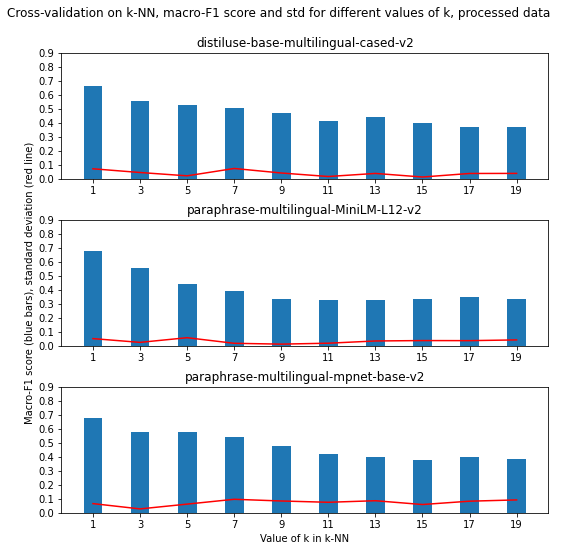

In [ ]:
'''
Visualise the macro F1-score and std for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

k = [x for x in range(1, 21, 2)]
# Subplots - change arguments here for every score
ax1.bar(k, scores_distil_proc_cv)
ax2.bar(k, scores_para_mini_proc_cv)
ax3.bar(k, scores_para_base_proc_cv)

ax1.plot(k, std_distil_proc_cv, color='red')
ax2.plot(k, std_para_mini_proc_cv, color='red')
ax3.plot(k, std_para_base_proc_cv, color='red')

ax1.set_xticks(np.arange(1,21,2))
ax2.set_xticks(np.arange(1,21,2))
ax3.set_xticks(np.arange(1,21,2))

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Cross-validation on k-NN, macro-F1 score and std for different values of k, processed data')
ax.set_ylabel('Macro-F1 score (blue bars), standard deviation (red line)')
ax.set_xlabel('Value of k in k-NN')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('cv-macro-f1-std-proc', dpi=300)
plt.show()

It seems that for the unprocessed data, choosing k=5 will strike a balance between macro-f1 accuracy and a low standard deviation, whereas k=3 will be better for processed data. We therefore retrain all unprocessed datasets with k=5 and all processed datasets with k=3 and then test for accuracy on the test set. 

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

Report distil_orig = /n {'Beer': {'precision': 0.9, 'recall': 0.8571428571428571, 'f1-score': 0.8780487804878048, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8, 'recall': 0.5714285714285714, 'f1-score': 0.6666666666666666, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'SoftDrinks': {'precision': 0.75, 'recall': 0.6, 'f1-score': 0.6666666666666665, 'support': 10}, 'Spirits': {'precision': 0.8947368421052632, 'recall': 0.85, 'f1-scor

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report distil_proc = /n {'Beer': {'precision': 0.7777777777777778, 'recall': 0.5833333333333334, 'f1-score': 0.6666666666666666, 'support': 12}, 'Burger': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.75, 'recall': 0.5, 'f1-score': 0.6, 'support': 6}, 'Dessert': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.5, 'recall': 0.6666666666666666, 'f1-score': 0.5714285714285715, 'support': 6}, 'Spirits': {'precision': 0.7777777777777778, 'recall': 0.4375, 'f1-score': 0.56, 'sup

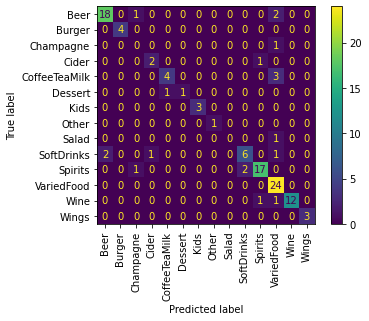

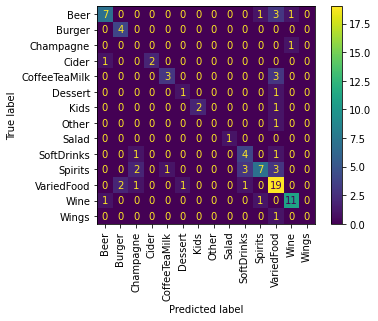

In [ ]:
# Distiluse model
# Original data
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(x_train_distil_orig, y_train_distil_orig)
pred_distil_orig = knn.predict(x_test_distil_orig)
class_report_distil_orig = classification_report(y_test_distil_orig, 
                                                 pred_distil_orig, output_dict=True)
cm_distil_orig = ConfusionMatrixDisplay.from_predictions(y_test_distil_orig,
                                                         pred_distil_orig, xticks_rotation='vertical')                                                 
print("Report distil_orig = /n", class_report_distil_orig)

# Processed data
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train_distil_proc, y_train_distil_proc)
pred_distil_proc = knn.predict(x_test_distil_proc)
class_report_distil_proc = classification_report(y_test_distil_proc, 
                                                 pred_distil_proc, output_dict=True)
cm_distil_proc = ConfusionMatrixDisplay.from_predictions(y_test_distil_proc,
                                                         pred_distil_proc, xticks_rotation='vertical')                                                 
print("Report distil_proc = /n", class_report_distil_proc)

# Save the reports as csv files
df_report_distil_knn_orig = pd.DataFrame(class_report_distil_orig).transpose()
df_report_distil_knn_proc = pd.DataFrame(class_report_distil_proc).transpose()
df_report_distil_knn_orig.to_csv('df-report-distil-knn-orig.csv')
df_report_distil_knn_proc.to_csv('df-report-distil-knn-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

Report para_mini_orig = /n {'Beer': {'precision': 0.6785714285714286, 'recall': 0.9047619047619048, 'f1-score': 0.7755102040816326, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8333333333333334, 'recall': 0.7142857142857143, 'f1-score': 0.7692307692307692, 'support': 7}, 'Dessert': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.47058823529411764, 'recall': 0.8, 'f1-score': 0.5925925925925927, 'support': 10}, 'Spirits': {'precision': 0.6666666666666666, 'recall': 0.6, 'f1-sc

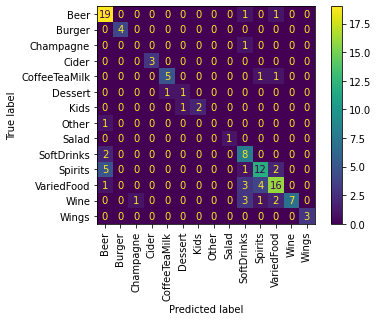

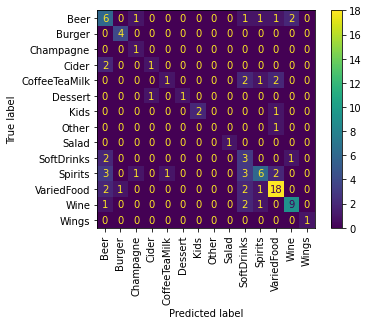

In [ ]:
# Para-mini model
# Original data
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(x_train_para_mini_orig, y_train_para_mini_orig)
pred_para_mini_orig = knn.predict(x_test_para_mini_orig)
class_report_para_mini_orig = classification_report(y_test_para_mini_orig, 
                                                 pred_para_mini_orig, output_dict=True)
cm_para_mini_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_orig,
                                                         pred_para_mini_orig, xticks_rotation='vertical')                                                 
print("Report para_mini_orig = /n", class_report_para_mini_orig)

# Processed data
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train_para_mini_proc, y_train_para_mini_proc)
pred_para_mini_proc = knn.predict(x_test_para_mini_proc)
class_report_para_mini_proc = classification_report(y_test_para_mini_proc, 
                                                 pred_para_mini_proc, output_dict=True)
cm_para_mini_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_proc,
                                                         pred_para_mini_proc, xticks_rotation='vertical')                                                 
print("Report para_mini_proc = /n", class_report_para_mini_proc)

# Save the reports as csv files
df_report_para_mini_knn_orig = pd.DataFrame(class_report_para_mini_orig).transpose()
df_report_para_mini_knn_proc = pd.DataFrame(class_report_para_mini_proc).transpose()
df_report_para_mini_knn_orig.to_csv('df-report-para-mini-knn-orig.csv')
df_report_para_mini_knn_proc.to_csv('df-report-para-mini-knn-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Report para_base_orig = /n {'Beer': {'precision': 0.782608695652174, 'recall': 0.8571428571428571, 'f1-score': 0.8181818181818182, 'support': 21}, 'Burger': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.888888888888889, 'support': 4}, 'Champagne': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.6363636363636364, 'recall': 0.7, 'f1-score': 0.6666666666666666, 'support': 10}, 'Spirits': {'precision': 0.9230769230769231, 'recall':

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


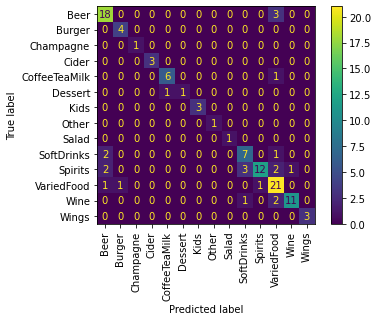

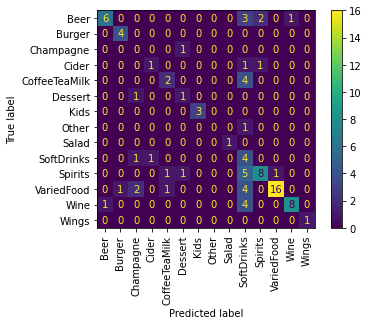

In [ ]:
# Para-base model
# Original data
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(x_train_para_base_orig, y_train_para_base_orig)
pred_para_base_orig = knn.predict(x_test_para_base_orig)
class_report_para_base_orig = classification_report(y_test_para_base_orig, 
                                                 pred_para_base_orig, output_dict=True)
cm_para_base_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_base_orig,
                                                         pred_para_base_orig, xticks_rotation='vertical')                                                 
print("Report para_base_orig = /n", class_report_para_base_orig)

# Processed data
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(x_train_para_base_proc, y_train_para_base_proc)
pred_para_base_proc = knn.predict(x_test_para_base_proc)
class_report_para_base_proc = classification_report(y_test_para_base_proc, 
                                                 pred_para_base_proc, output_dict=True)
cm_para_base_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_base_proc,
                                                         pred_para_base_proc, xticks_rotation='vertical')                                                 
print("Report para_base_proc = /n", class_report_para_base_proc)

# Save the reports as csv files
df_report_para_base_knn_orig = pd.DataFrame(class_report_para_base_orig).transpose()
df_report_para_base_knn_proc = pd.DataFrame(class_report_para_base_proc).transpose()
df_report_para_base_knn_orig.to_csv('df-report-para-base-knn-orig.csv')
df_report_para_base_knn_proc.to_csv('df-report-para-base-knn-proc.csv')

Let us visualise the results.

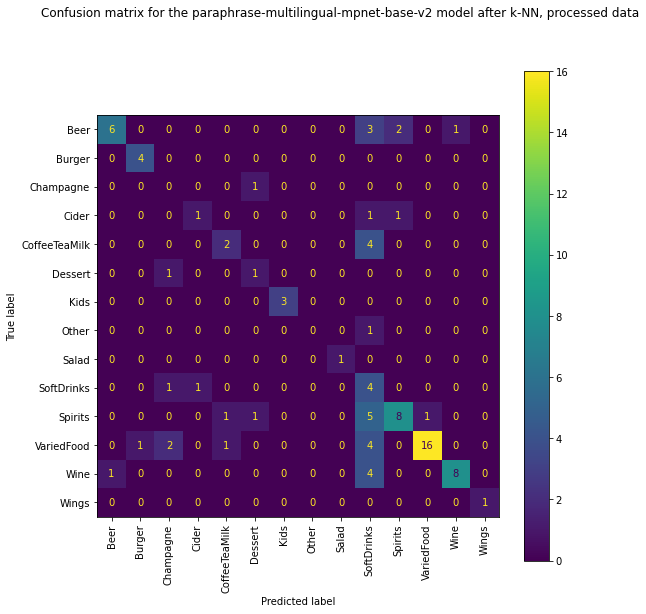

In [ ]:
''' Visualise the confusion matrices for all datasets. 
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''
fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)

# Subplots - change here for other datasets 
cm_para_base_proc.plot(xticks_rotation='vertical', ax=ax)

# Set the suptitle and common labels
fig.suptitle('Confusion matrix for the paraphrase-multilingual-mpnet-base-v2 model after k-NN, processed data')

# Change here for different datasets
plt.savefig('cm-para-base-knn-proc', dpi=300)
plt.show()


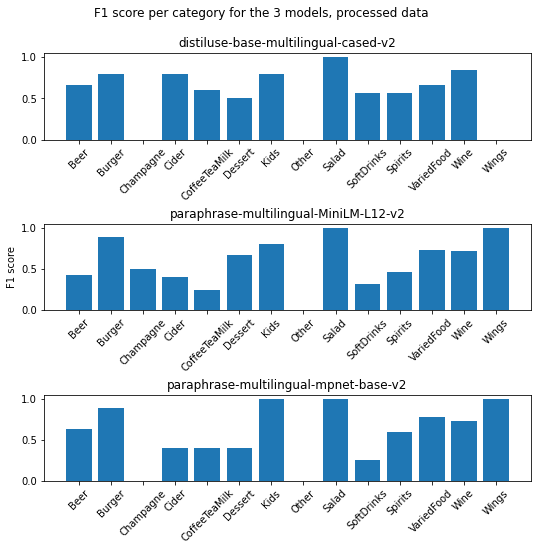

In [ ]:
'''
Visualise the F1 score per category for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

f1_distil_proc = df_report_distil_knn_proc['f1-score'].values.tolist()
f1_para_mini_proc = df_report_para_mini_knn_proc['f1-score'].values.tolist()
f1_para_base_proc = df_report_para_base_knn_proc['f1-score'].values.tolist()

# Subplots - change arguments here for every score
ax1.bar(categories, f1_distil_proc[:14])
ax2.bar(categories, f1_para_mini_proc[:14])
ax3.bar(categories, f1_para_base_proc[:14])

ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)
ax3.tick_params(axis='x',labelrotation=45)

# Set the suptitle and common labels
fig.suptitle('F1 score per category for the 3 models, processed data')
ax.set_ylabel('F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('f1-cat-knn-proc', dpi=300)
plt.show()

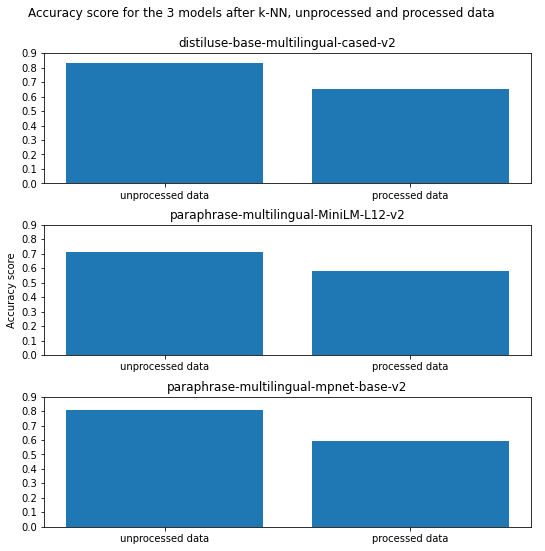

In [ ]:
'''
Visualise the accuracy score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

acc_distil_orig = df_report_distil_knn_orig['f1-score'].values.tolist()[14]
acc_distil_proc = df_report_distil_knn_proc['f1-score'].values.tolist()[14]
acc_para_mini_orig = df_report_para_mini_knn_orig['f1-score'].values.tolist()[14]
acc_para_mini_proc = df_report_para_mini_knn_proc['f1-score'].values.tolist()[14]
acc_para_base_orig = df_report_para_base_knn_orig['f1-score'].values.tolist()[14]
acc_para_base_proc = df_report_para_base_knn_proc['f1-score'].values.tolist()[14]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [acc_distil_orig, acc_distil_proc])
ax2.bar(categories, [acc_para_mini_orig, acc_para_mini_proc])
ax3.bar(categories, [acc_para_base_orig, acc_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Accuracy score for the 3 models after k-NN, unprocessed and processed data')
ax.set_ylabel('Accuracy score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('acc-knn-score', dpi=300)
plt.show()

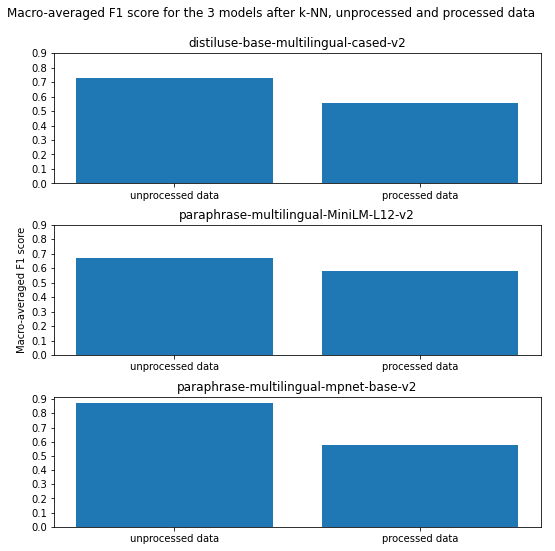

In [ ]:
'''
Visualise the macro F1-score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

mac_f1_distil_orig = df_report_distil_knn_orig['f1-score'].values.tolist()[15]
mac_f1_distil_proc = df_report_distil_knn_proc['f1-score'].values.tolist()[15]
mac_f1_para_mini_orig = df_report_para_mini_knn_orig['f1-score'].values.tolist()[15]
mac_f1_para_mini_proc = df_report_para_mini_knn_proc['f1-score'].values.tolist()[15]
mac_f1_para_base_orig = df_report_para_base_knn_orig['f1-score'].values.tolist()[15]
mac_f1_para_base_proc = df_report_para_base_knn_proc['f1-score'].values.tolist()[15]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [mac_f1_distil_orig, mac_f1_distil_proc])
ax2.bar(categories, [mac_f1_para_mini_orig, mac_f1_para_mini_proc])
ax3.bar(categories, [mac_f1_para_base_orig, mac_f1_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Macro-averaged F1 score for the 3 models after k-NN, unprocessed and processed data')
ax.set_ylabel('Macro-averaged F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('macro-f1-knn-score', dpi=300)
plt.show()

"Neighborhood Components Analysis (NCA, NeighborhoodComponentsAnalysis) is a distance metric learning algorithm which aims to improve the accuracy of nearest neighbors classification compared to the standard Euclidean distance." 
"Combined with a nearest neighbors classifier (KNeighborsClassifier), NCA is attractive for classification because it can naturally handle multi-class problems without any increase in the model size, and does not introduce additional parameters that require fine-tuning by the user." 
(Read here: https://scikit-learn.org/stable/modules/neighbors.html#nca).
For all the above reasons, we will implement NCA with k-NN and visualise the results.

Report distil_nca_orig = /n {'Beer': {'precision': 1.0, 'recall': 0.9047619047619048, 'f1-score': 0.9500000000000001, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8, 'recall': 0.5714285714285714, 'f1-score': 0.6666666666666666, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.8181818181818182, 'recall': 0.9, 'f1-score': 0.8571428571428572, 'support': 10}, 'Spirits': {'precision': 0.8571428571428571, 'recall': 0.9, 'f1-score': 0.8780487

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report distil_nca_proc = /n {'Beer': {'precision': 0.7777777777777778, 'recall': 0.5833333333333334, 'f1-score': 0.6666666666666666, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'CoffeeTeaMilk': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 6}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1}, 'SoftDrinks': {'precision': 0.4444444444444444, 'recall': 0.6666666666666666, 'f1-score': 0.5333333333333333, 'support': 6}, 'Spirits': {'precision': 0.6666666666666666, 'recall

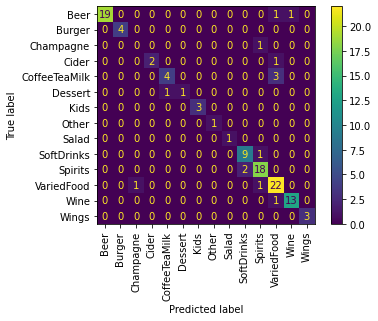

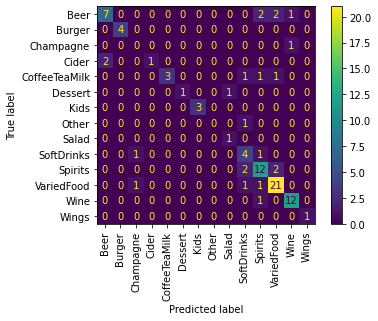

In [ ]:
# Distiluse model
# Original data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_orig = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
nca.fit(x_train_distil_orig, np.ravel(y_train_distil_orig))
knn_orig.fit(nca.transform(x_train_distil_orig), np.ravel(y_train_distil_orig))

pred_distil_nca_orig = knn_orig.predict(nca.transform(x_test_distil_orig))
class_report_distil_nca_orig = classification_report(y_test_distil_orig, 
                                                 pred_distil_nca_orig, output_dict=True)
cm_distil_nca_orig = ConfusionMatrixDisplay.from_predictions(y_test_distil_orig,
                                                         pred_distil_nca_orig, xticks_rotation='vertical')                                                 
print("Report distil_nca_orig = /n", class_report_distil_nca_orig)

# Processed data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_proc = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
nca.fit(x_train_distil_proc, np.ravel(y_train_distil_proc))
knn_proc.fit(nca.transform(x_train_distil_proc), np.ravel(y_train_distil_proc))

pred_distil_nca_proc = knn_proc.predict(nca.transform(x_test_distil_proc))
class_report_distil_nca_proc = classification_report(y_test_distil_proc, 
                                                 pred_distil_nca_proc, output_dict=True)
cm_distil_nca_proc = ConfusionMatrixDisplay.from_predictions(y_test_distil_proc,
                                                         pred_distil_nca_proc, xticks_rotation='vertical')                                                 
print("Report distil_nca_proc = /n", class_report_distil_nca_proc)


df_report_distil_nca_orig = pd.DataFrame(class_report_distil_nca_orig).transpose()
df_report_distil_nca_proc = pd.DataFrame(class_report_distil_nca_proc).transpose()
df_report_distil_nca_orig.to_csv('df-report-distil-nca-orig.csv')
df_report_distil_nca_proc.to_csv('df-report-distil-nca-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_mini_nca_orig = /n {'Beer': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 21}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8333333333333334, 'recall': 0.7142857142857143, 'f1-score': 0.7692307692307692, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'SoftDrinks': {'precision': 0.6153846153846154, 'recall': 0.8, 'f1-score': 0.6956521739130435, 'support': 10}, 'Spirits': {'precision': 0.6818181818181818, 'recall': 0.75, 'f

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_mini_nca_proc = /n {'Beer': {'precision': 0.7, 'recall': 0.5833333333333334, 'f1-score': 0.6363636363636365, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Cider': {'precision': 0.4, 'recall': 0.6666666666666666, 'f1-score': 0.5, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.3333333333333333, 'recall': 0.16666666666666666, 'f1-score': 0.2222222222222222, 'support': 6}, 'Dessert': {'precision': 1.0, 'recall': 0.5, 'f1-score': 0.6666666666666666, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.8, 'recall': 0.6666666666666666, 'f1-score': 0.7272727272727272, 'support': 6}, 'Spirits': {'precision': 0.6111111111111112, 'recall': 0.6875, 

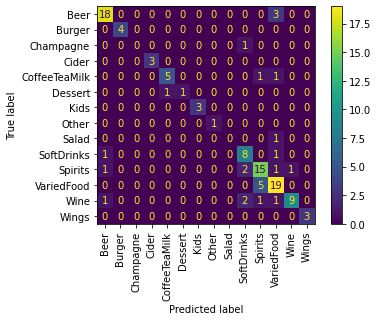

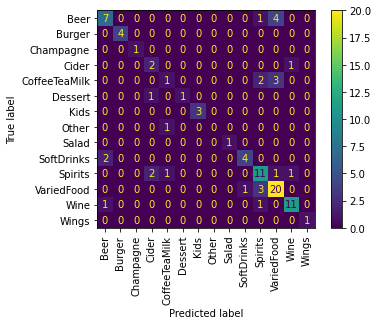

In [ ]:
# Para-mini model
# Original data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_orig = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
nca.fit(x_train_para_mini_orig, np.ravel(y_train_para_mini_orig))
knn_orig.fit(nca.transform(x_train_para_mini_orig), np.ravel(y_train_para_mini_orig))

pred_para_mini_nca_orig = knn_orig.predict(nca.transform(x_test_para_mini_orig))
class_report_para_mini_nca_orig = classification_report(y_test_para_mini_orig, 
                                                 pred_para_mini_nca_orig, output_dict=True)
cm_para_mini_nca_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_orig,
                                                         pred_para_mini_nca_orig, xticks_rotation='vertical')                                                 
print("Report para_mini_nca_orig = /n", class_report_para_mini_nca_orig)

# Processed data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_proc = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
nca.fit(x_train_para_mini_proc, np.ravel(y_train_para_mini_proc))
knn_proc.fit(nca.transform(x_train_para_mini_proc), np.ravel(y_train_para_mini_proc))

pred_para_mini_nca_proc = knn_proc.predict(nca.transform(x_test_para_mini_proc))
class_report_para_mini_nca_proc = classification_report(y_test_para_mini_proc, 
                                                 pred_para_mini_nca_proc, output_dict=True)
cm_para_mini_nca_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_mini_proc,
                                                         pred_para_mini_nca_proc, xticks_rotation='vertical')                                                 
print("Report para_mini_nca_proc = /n", class_report_para_mini_nca_proc)


df_report_para_mini_nca_orig = pd.DataFrame(class_report_para_mini_nca_orig).transpose()
df_report_para_mini_nca_proc = pd.DataFrame(class_report_para_mini_nca_proc).transpose()
df_report_para_mini_nca_orig.to_csv('df-report-para-mini-nca-orig.csv')
df_report_para_mini_nca_proc.to_csv('df-report-para-mini-nca-proc.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_base_nca_orig = /n {'Beer': {'precision': 0.7307692307692307, 'recall': 0.9047619047619048, 'f1-score': 0.8085106382978723, 'support': 21}, 'Burger': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.888888888888889, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.8571428571428571, 'recall': 0.8571428571428571, 'f1-score': 0.8571428571428571, 'support': 7}, 'Dessert': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2}, 'Kids': {'precision': 0.5, 'recall': 0.3333333333333333, 'f1-score': 0.4, 'support': 3}, 'Other': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.7777777777777778, 'recall': 0.7, 'f1-score': 0.7368421052631577, 'support': 10}, 'Spirits': {'precision': 0.7777777

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report para_base_nca_proc = /n {'Beer': {'precision': 0.8181818181818182, 'recall': 0.75, 'f1-score': 0.7826086956521738, 'support': 12}, 'Burger': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'Champagne': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Cider': {'precision': 1.0, 'recall': 0.3333333333333333, 'f1-score': 0.5, 'support': 3}, 'CoffeeTeaMilk': {'precision': 0.5, 'recall': 0.3333333333333333, 'f1-score': 0.4, 'support': 6}, 'Dessert': {'precision': 0.5, 'recall': 0.5, 'f1-score': 0.5, 'support': 2}, 'Kids': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, 'Other': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'Salad': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1}, 'SoftDrinks': {'precision': 0.4166666666666667, 'recall': 0.8333333333333334, 'f1-score': 0.5555555555555556, 'support': 6}, 'Spirits': {'precision': 0.6153846153846154, 'recall': 0.5, 'f1-score': 0.5517241379310345, '

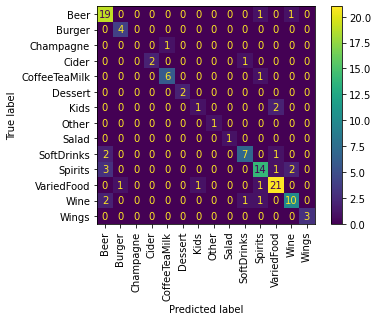

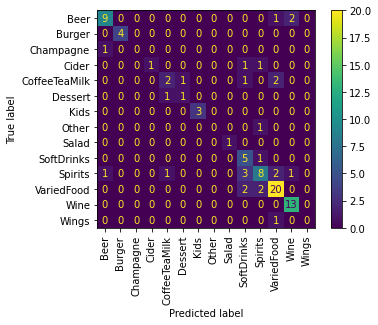

In [ ]:
# Para-base model
# Original data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_orig = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
nca.fit(x_train_para_base_orig, np.ravel(y_train_para_base_orig))
knn_orig.fit(nca.transform(x_train_para_base_orig), np.ravel(y_train_para_base_orig))

pred_para_base_nca_orig = knn_orig.predict(nca.transform(x_test_para_base_orig))
class_report_para_base_nca_orig = classification_report(y_test_para_base_orig, 
                                                 pred_para_base_nca_orig, output_dict=True)
cm_para_base_nca_orig = ConfusionMatrixDisplay.from_predictions(y_test_para_base_orig,
                                                         pred_para_base_nca_orig, xticks_rotation='vertical')                                                 
print("Report para_base_nca_orig = /n", class_report_para_base_nca_orig)

# Processed data
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn_proc = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
nca.fit(x_train_para_base_proc, np.ravel(y_train_para_base_proc))
knn_proc.fit(nca.transform(x_train_para_base_proc), np.ravel(y_train_para_base_proc))

pred_para_base_nca_proc = knn_proc.predict(nca.transform(x_test_para_base_proc))
class_report_para_base_nca_proc = classification_report(y_test_para_base_proc, 
                                                 pred_para_base_nca_proc, output_dict=True)
cm_para_base_nca_proc = ConfusionMatrixDisplay.from_predictions(y_test_para_base_proc,
                                                         pred_para_base_nca_proc, xticks_rotation='vertical')                                                 
print("Report para_base_nca_proc = /n", class_report_para_base_nca_proc)


df_report_para_base_nca_orig = pd.DataFrame(class_report_para_base_nca_orig).transpose()
df_report_para_base_nca_proc = pd.DataFrame(class_report_para_base_nca_proc).transpose()
df_report_para_base_nca_orig.to_csv('df-report-para-base-nca-orig.csv')
df_report_para_base_nca_proc.to_csv('df-report-para-base-nca-proc.csv')

Let us visualise the latest results.

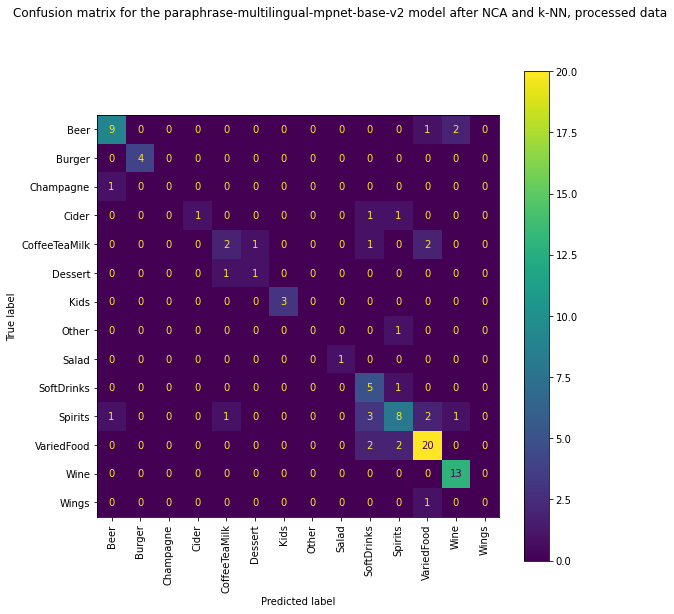

In [ ]:
''' Visualise the confusion matrices for all datasets. 
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''
fig = plt.figure()
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)

# Subplots - change here for other datasets 
cm_para_base_nca_proc.plot(xticks_rotation='vertical', ax=ax)

# Set the suptitle and common labels
fig.suptitle(
    'Confusion matrix for the paraphrase-multilingual-mpnet-base-v2 model after NCA and k-NN, processed data')

# Change here for different datasets
plt.savefig('cm-para-base-nca-proc', dpi=300)
plt.show()

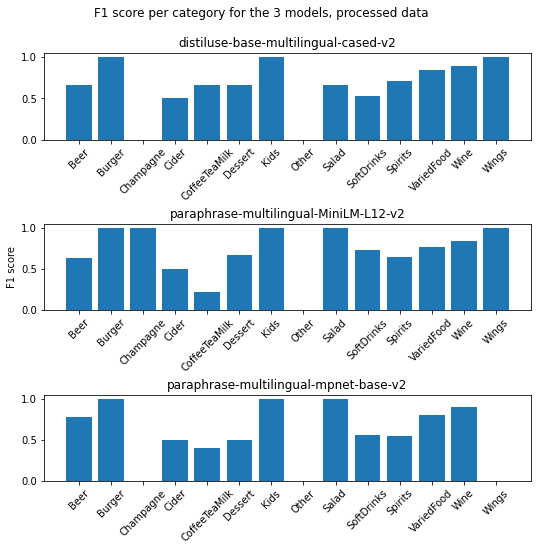

In [ ]:
'''
Visualise the F1 score per category for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

f1_distil_proc = df_report_distil_nca_proc['f1-score'].values.tolist()
f1_para_mini_proc = df_report_para_mini_nca_proc['f1-score'].values.tolist()
f1_para_base_proc = df_report_para_base_nca_proc['f1-score'].values.tolist()

# Subplots - change arguments here for every score
ax1.bar(categories, f1_distil_proc[:14])
ax2.bar(categories, f1_para_mini_proc[:14])
ax3.bar(categories, f1_para_base_proc[:14])

ax1.tick_params(axis='x',labelrotation=45)
ax2.tick_params(axis='x',labelrotation=45)
ax3.tick_params(axis='x',labelrotation=45)

# Set the suptitle and common labels
fig.suptitle('F1 score per category for the 3 models, processed data')
ax.set_ylabel('F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('f1-cat-nca-proc', dpi=300)
plt.show()

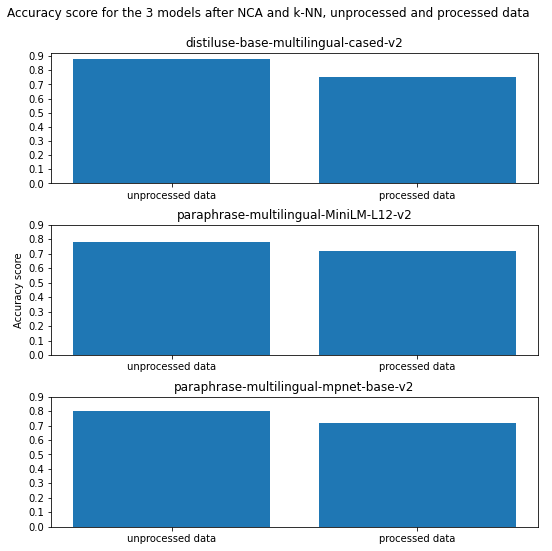

In [ ]:
'''
Visualise the accuracy score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

acc_distil_orig = df_report_distil_nca_orig['f1-score'].values.tolist()[14]
acc_distil_proc = df_report_distil_nca_proc['f1-score'].values.tolist()[14]
acc_para_mini_orig = df_report_para_mini_nca_orig['f1-score'].values.tolist()[14]
acc_para_mini_proc = df_report_para_mini_nca_proc['f1-score'].values.tolist()[14]
acc_para_base_orig = df_report_para_base_nca_orig['f1-score'].values.tolist()[14]
acc_para_base_proc = df_report_para_base_nca_proc['f1-score'].values.tolist()[14]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [acc_distil_orig, acc_distil_proc])
ax2.bar(categories, [acc_para_mini_orig, acc_para_mini_proc])
ax3.bar(categories, [acc_para_base_orig, acc_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Accuracy score for the 3 models after NCA and k-NN, unprocessed and processed data')
ax.set_ylabel('Accuracy score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('acc-nca-score', dpi=300)
plt.show()

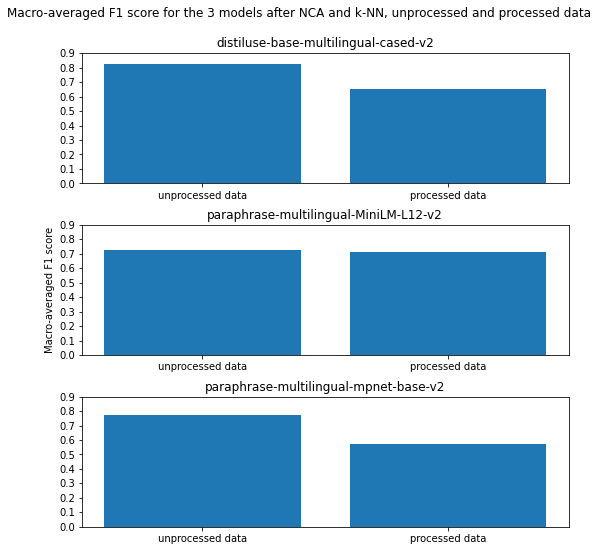

In [ ]:
'''
Visualise the macro F1-score for all datasets.
Models: 
'distiluse-base-multilingual-cased-v2',  
'paraphrase-multilingual-MiniLM-L12-v2' and
'paraphrase-multilingual-mpnet-base-v2'. 
'''

# Plot grid
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

mac_f1_distil_orig = df_report_distil_nca_orig['f1-score'].values.tolist()[15]
mac_f1_distil_proc = df_report_distil_nca_proc['f1-score'].values.tolist()[15]
mac_f1_para_mini_orig = df_report_para_mini_nca_orig['f1-score'].values.tolist()[15]
mac_f1_para_mini_proc = df_report_para_mini_nca_proc['f1-score'].values.tolist()[15]
mac_f1_para_base_orig = df_report_para_base_nca_orig['f1-score'].values.tolist()[15]
mac_f1_para_base_proc = df_report_para_base_nca_proc['f1-score'].values.tolist()[15]

categories = ['unprocessed data', 'processed data']
# Subplots - change arguments here for every score
ax1.bar(categories, [mac_f1_distil_orig, mac_f1_distil_proc])
ax2.bar(categories, [mac_f1_para_mini_orig, mac_f1_para_mini_proc])
ax3.bar(categories, [mac_f1_para_base_orig, mac_f1_para_base_proc])

ax1.set_yticks(np.arange(0,1,0.1))
ax2.set_yticks(np.arange(0,1,0.1))
ax3.set_yticks(np.arange(0,1,0.1))

# Set the suptitle and common labels
fig.suptitle('Macro-averaged F1 score for the 3 models after NCA and k-NN, unprocessed and processed data')
ax.set_ylabel('Macro-averaged F1 score')

# Set the subplot titles
ax1.set_title('distiluse-base-multilingual-cased-v2')
ax2.set_title('paraphrase-multilingual-MiniLM-L12-v2')
ax3.set_title('paraphrase-multilingual-mpnet-base-v2')

# Adjust sizes of subplots automatically
plt.tight_layout()

# Adjust the suptitle overlap
plt.subplots_adjust(top=0.9)

# Save and plot - change here for every score
plt.savefig('macro-f1-nca-score', dpi=300)
plt.show()

Since k-NN can perform poorly on high-dimensional data, we can perform dimensionality reduction, using either PCA, LDA or NCA, and run k-NN again. For this, please refer to the notebook exjobb-kNN-2. 